# Ensemble learning
* The Ensemble methods in machine learning combine the insights obtained from multiple learning models to facilitate accurate and improved decisions.
* There are two main types of ensemble learning:
    * Bagging (Bootstrap Aggregating)
    * Boosting
* Techniques:
    * Basic Ensemble techniques
        * Max Voting
        * Averaging or Weighted Average
    * Advanced Ensemble techniques
        * Stacking
        * Blending
        * Bagging
        * Boosting
    * Algorithms based on Baggind and Boosting
        * Bagging algorithms:
            * Bagging meta-estimator
            * Random forest
        * Boosting algorithms:
            * AdaBoost
            * GBM
            * XGBM
            * Light GBM
            * CatBoost


# Basic Ensemble techniques
## 1. Max Voting
* The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point.
* The predictions by each model are considered as a 'vote'. The predictions which we get from the majority of the models are used as the final prediction.
* In it the voting classifier is used.
* It used when the data is devided into the classes or the problem blongs to the classification algorithm.

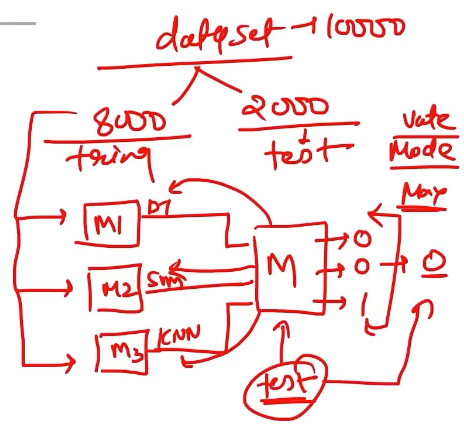 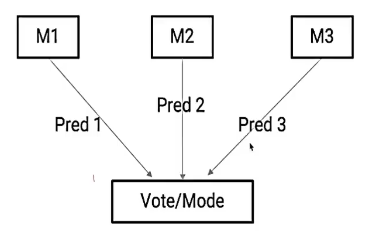 

Below is a practicale use of Max voting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
x, y = make_moons(n_samples=1000, noise=0.2)
x,y

(array([[ 1.64494061, -0.31930575],
        [-1.08588866,  0.42857674],
        [ 0.8819504 ,  0.52062437],
        ...,
        [ 1.81307799,  0.44779987],
        [-0.04225341, -0.15726263],
        [ 1.82771644, -0.00859782]]),
 array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 

In [3]:
data = {'x1':x[:,0],'x2':x[:,1],'y':y}
df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,x1,x2,y
0,1.644941,-0.319306,1
1,-1.085889,0.428577,0
2,0.881950,0.520624,0
3,0.650484,-0.515933,1
4,1.651154,-0.244704,1


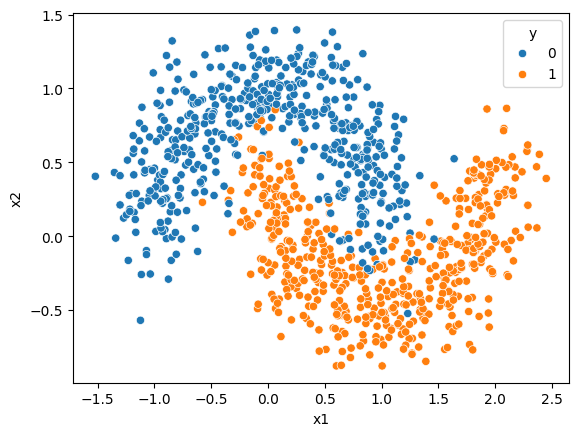

In [4]:
sns.scatterplot(x='x1',y='x2',hue='y',data=df)
plt.show()

In [5]:
x = df.drop(columns='y')
y = df['y']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [8]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)

(1.0, 0.936)

In [9]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.9666666666666667, 0.948)

In [10]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train), gnb.score(x_test, y_test)

(0.868, 0.832)

### Now using the Max voting technique

In [11]:
from sklearn.ensemble import VotingClassifier

In [26]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()),('gnb1',GaussianNB())]
vc = VotingClassifier(estimators=li,weights=[10,4,7])
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 4, 7])

In [27]:
vc.score(x_train, y_train), vc.score(x_test, y_test)

(0.976, 0.944)

In [30]:
predict = {'dt':dt.predict(x_test),'svc':svc.predict(x_test),'gnb':gnb.predict(x_test), 'vc':vc.predict(x_test)}
pd.DataFrame(predict)

,dt,svc,gnb,vc
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
245,0,0,0,0
246,1,1,1,1
247,0,1,1,1
248,1,1,1,1


## 2. Averaging and Weighted Average
* Take an average of predictions from all the models and use it to make the final prediction.
* Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.
* In it the voting regressior is used.
* It used when the problem is regression problem.

Below is the practical use of a Averaging and Weighted Average

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [54]:
df = pd.read_csv('../dataset/placement.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


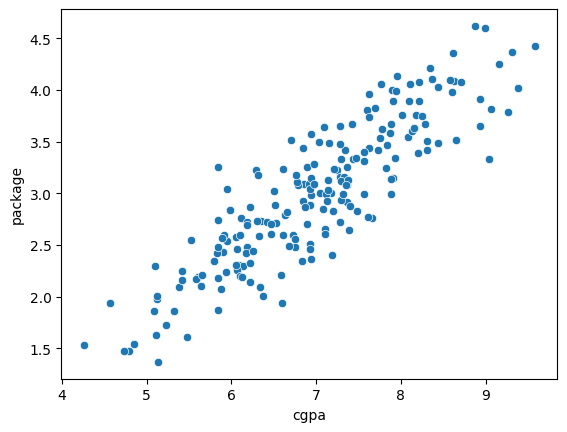

In [55]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.show()

In [56]:
x = df.iloc[:,:-1]
y = df['package']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [58]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.7748832241653935, 0.7774721122516276)

In [59]:
dr = DecisionTreeRegressor()
dr.fit(x_train, y_train)
dr.score(x_train, y_train), dr.score(x_test, y_test)

(0.9491076608952679, 0.646920120760248)

In [60]:
svr = SVR()
svr.fit(x_train, y_train)
svr.score(x_train, y_train), svr.score(x_test, y_test)

(0.7816541869605287, 0.7648823445728576)

In [61]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(x_train, y_train)
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.7821000097722032, 0.7697793687900564)

### Now using the Averaging and Weighted average technique

In [62]:
from sklearn.ensemble import VotingRegressor

In [88]:
li=[('lr1',LinearRegression()),('dr1',DecisionTreeRegressor()),('svr1',SVR()),('knn1',KNeighborsRegressor())]
vr = VotingRegressor(estimators=li,weights=[10,2,10,10])
vr.fit(x_train, y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dr1', DecisionTreeRegressor()), ('svr1', SVR()),
                            ('knn1', KNeighborsRegressor())],
                weights=[10, 2, 10, 10])

In [89]:
vr.score(x_train, y_train), vr.score(x_test, y_test)

(0.815870282623719, 0.7704718616539985)

In [93]:
predict = {'lr':lr.predict(x_test),'dr':dr.predict(x_test),'svr':svr.predict(x_test),'knn':knn.predict(x_test),'vr':vr.predict(x_test)}
pd.DataFrame(predict)

,lr,dr,svr,knn,vr
0,2.786588,2.920000,2.735463,2.789231,2.726266
1,3.140678,3.252500,3.115500,3.082308,3.166462
2,3.203501,2.920000,3.197764,3.183077,3.132895
3,2.398231,2.540000,2.408542,2.510000,2.477116
4,3.529035,3.990000,3.623576,3.631538,3.682691
5,3.768903,4.110000,3.849778,3.800000,3.807713
6,3.169234,3.330000,3.152486,3.105385,3.202412
7,2.552431,2.235000,2.543434,2.574615,2.504645
8,3.180656,3.330000,3.167479,3.170000,3.183792
9,3.494769,3.140000,3.583222,3.604615,3.467497


# Advanced Ensemble Techniques
## 1. Bagging(Bootstrap Aggregation)
* Bagging(Bootstrap Aggregating) technique uses thse subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

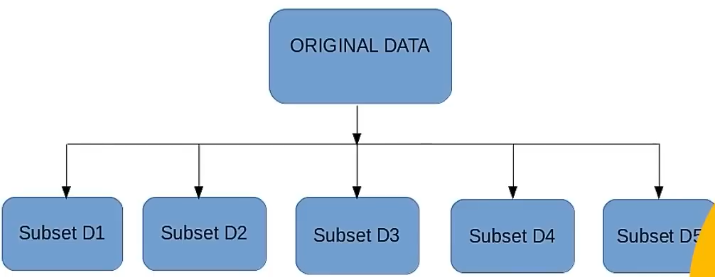 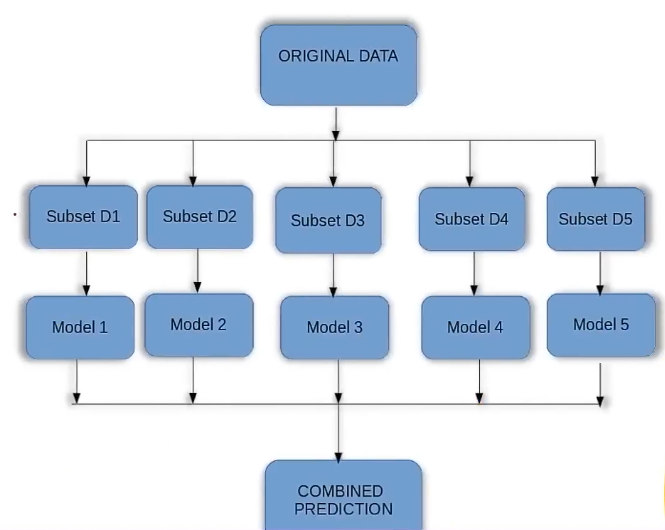

* Bagging algorithms
    * Bagging meta-estimator
    * Random forest

* **Bagging meta-estimator**: It is an ensembling algorithm that can be used for both classification (Bagging Classifier) and regressin (Bagging Regressor) problems. It follows the typical bagging technique to make predictions.
* **Random Forest**: It is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [100]:
x, y= make_moons(n_samples=1000,noise=0.2)
df = pd.DataFrame({'x1':x[:,0],'x2':x[:,1],'y':y})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,x1,x2,y
0,2.069727,-0.255249,1
1,0.735001,0.697221,0
2,0.764302,1.362874,0
3,0.252462,0.096955,1
4,1.914219,-0.145056,1


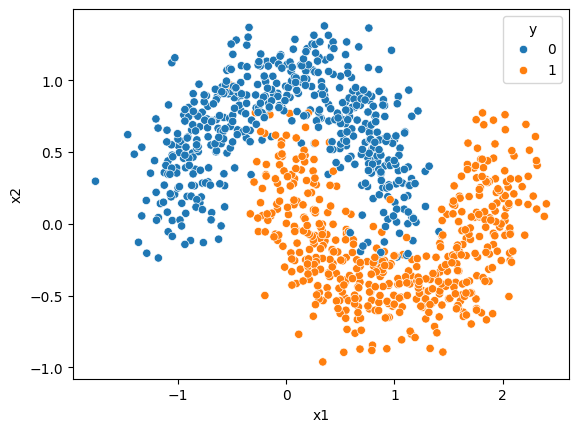

In [101]:
sns.scatterplot(x='x1',y='x2',hue='y',data=df)
plt.show()

In [102]:
x = df.iloc[:,:-1]
y = df['y']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [111]:
svr = SVC()
svr.fit(x_train, y_train)
svr.score(x_train, y_train), svr.score(x_test, y_test)

(0.9653333333333334, 0.976)

### Using Bagging meta estimator in classification

In [118]:
bg = BaggingClassifier(estimator=SVC(), n_estimators=20)
bg.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=20)

In [119]:
bg.score(x_train, y_train), bg.score(x_test, y_test)

(0.9666666666666667, 0.976)

### Using Random Forest in classification

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [145]:
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.996, 0.964)

### Bagging meta estimator in Regression

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [148]:
df = pd.read_csv('../dataset/placement.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


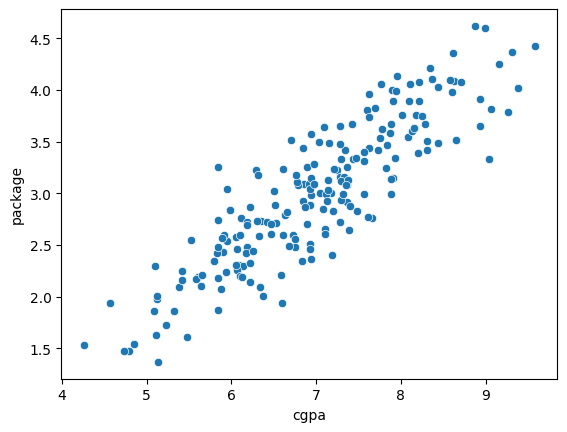

In [149]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.show()

In [150]:
x = df.iloc[:,:-1]
y = df['package']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.7748832241653935, 0.7774721122516276)

### using Bagging meta estimator in Regression

In [162]:
from sklearn.ensemble import BaggingRegressor

In [203]:
bg = BaggingRegressor(estimator=LinearRegression(),n_estimators=20)
bg.fit(x_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=20)

In [204]:
bg.score(x_train, y_train), bg.score(x_test, y_test)

(0.7747920388812073, 0.7769556836148149)

### using Random Forest in Regression

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
rf = RandomForestRegressor(n_estimators=20, max_depth=3)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=20)

In [207]:
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.8060181383631821, 0.7548060318758013)